In [32]:
print("Shree")

Shree


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   


In [34]:
data = pd.read_csv('2001_census.csv')

In [35]:
data.head()

local authority name  All usual residents  White British  White Irish  \
0        City of London                 7177           4909          241   
1  Barking and Dagenham                10206           4713          186   
2  Barking and Dagenham                 9300           8432          134   
3  Barking and Dagenham                11450           8902          175   
4  Barking and Dagenham                 9299           7726          172   

   White Gypsy/Irish Traveller  White Other  Mixed White and Asian  \
0                          NaN          925                     55   
1                          NaN          649                     62   
2                          NaN          127                     16   
3                          NaN          473                     41   
4                          NaN          205                     32   

   Mixed White and Black African  Mixed White and Black Caribbean  \
0                             21                               30   
1                             84                               89   
2                             18                               74   
3                             34                              121   
4                             17                               77   

   Mixed Other  Asian Bangladeshi  Asian Chinese  Asian Indian  \
0           55                276            271           158   
1           92                174            215           902   
2           18                 14             24            35   
3           40                 89            188           317   
4           32                 26             77           255   

   Asian Pakistani  Asian Other  Black African  Black Caribbean  Black Other  \
0               23           31            117               51           14   
1             1368          215            941              439           77   
2               16            3            250              123           16   
3              217           75            438              278           62   
4              104           51            227              236           62   

   Other Arab  Other Any other  
0         NaN              NaN  
1         NaN              NaN  
2         NaN              NaN  
3         NaN              NaN  
4         NaN              NaN

In [36]:
data.columns[0]

'local authority name'

In [37]:
grouped_data = data.groupby(data.columns[0]).sum()
grouped_data_copy = grouped_data.copy()
grouped_data.head()
grouped_data.to_csv('test.csv')

In [38]:
grouped_data.columns

Index(['All usual residents', 'White British', 'White Irish',
       'White Gypsy/Irish Traveller', 'White Other', 'Mixed White and Asian',
       'Mixed White and Black African', 'Mixed White and Black Caribbean',
       'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian',
       'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean',
       'Black Other', 'Other Arab', 'Other Any other'],
      dtype='object')

In [39]:
grouped_data.shape

(33, 19)

In [40]:
grouped_data['Others'] = grouped_data['White Other'] + grouped_data['Asian Other'] + grouped_data['Black Other'] + grouped_data['Mixed Other'] + grouped_data['Other Any other'] + grouped_data['Other Arab']

In [41]:
grouped_data = grouped_data.drop(columns=['All usual residents','Black Other', 'White Other', 'Mixed Other', 'Asian Other','Other Any other', 'Other Arab' ])


In [42]:
grouped_data.head()

White British  White Irish  White Gypsy/Irish Traveller  \
local authority name                                                            
Barking and Dagenham         132566         2753                          0.0   
Barnet                       188301        10545                          0.0   
Bexley                       191947         3025                          0.0   
Brent                         76893        18313                          0.0   
Bromley                      255618         4652                          0.0   

                      Mixed White and Asian  Mixed White and Black African  \
local authority name                                                         
Barking and Dagenham                    534                            572   
Barnet                                 3218                           1590   
Bexley                                  915                            394   
Brent                                  2529                           1739   
Bromley                                1716                            578   

                      Mixed White and Black Caribbean  Asian Bangladeshi  \
local authority name                                                       
Barking and Dagenham                             1420                673   
Barnet                                           1670               1448   
Bexley                                            868                386   
Brent                                            2739               1184   
Bromley                                          1887                868   

                      Asian Chinese  Asian Indian  Asian Pakistani  \
local authority name                                                 
Barking and Dagenham           1475          3681             3055   
Barnet                        14534         27130             3965   
Bexley                         2294          5548              333   
Brent                          8985         48624            10626   
Bromley                        3186          4458              691   

                      Black African  Black Caribbean   Others  
local authority name                                           
Barking and Dagenham           7284             3434   6497.0  
Barnet                        13651             4113  44399.0  
Bexley                         4085             1762   6750.0  
Brent                         20640            27574  43618.0  
Bromley                        3374             4637  13872.0

In [43]:
grouped_data['Total_Population'] = grouped_data.sum(axis=1)


In [44]:
grouped_data['Total_Population'] = grouped_data.sum(axis=1)
ethnic_columns = grouped_data.columns[:-1]  # All columns except 'Total Population'
data_percentage = grouped_data[ethnic_columns].div(grouped_data['Total_Population'], axis=0) * 100

In [45]:
ethnic_columns

Index(['White British', 'White Irish', 'White Gypsy/Irish Traveller',
       'Mixed White and Asian', 'Mixed White and Black African',
       'Mixed White and Black Caribbean', 'Asian Bangladeshi', 'Asian Chinese',
       'Asian Indian', 'Asian Pakistani', 'Black African', 'Black Caribbean',
       'Others'],
      dtype='object')

In [46]:
data_percentage

White British  White Irish  \
local authority name                                 
Barking and Dagenham        40.430269     0.839616   
Barnet                      29.930475     1.676129   
Bexley                      43.962631     0.692832   
Brent                       14.592696     3.475427   
Bromley                     43.246362     0.787042   
Camden                      26.358449     2.310120   
City of London              34.199526     1.678975   
Croydon                     31.848349     1.078385   
Ealing                      22.452218     2.373334   
Enfield                     30.595594     1.534952   
Greenwich                   35.281922     1.133846   
Hackney                     22.060999     1.507958   
Hammersmith and Fulham      29.020770     2.415548   
Haringey                    22.638529     2.148198   
Harrow                      24.951647     2.189649   
Havering                    46.012468     0.755856   
Hillingdon                  36.263153     1.421975   
Hounslow                    27.884629     1.459445   
Islington                   28.380462     2.860401   
Kensington and Chelsea      25.042317     1.630705   
Kingston upon Thames        37.960373     1.086765   
Lambeth                     24.784817     1.632234   
Lewisham                    28.485630     1.404054   
Merton                      32.031100     1.453903   
Newham                      16.890742     0.662386   
Redbridge                   28.725250     1.164750   
Richmond upon Thames        39.357251     1.394063   
Southwark                   26.086104     1.566979   
Sutton                      41.863680     1.019091   
Tower Hamlets               21.455488     0.974728   
Waltham Forest              27.867876     1.170646   
Wandsworth                  32.388240     1.565212   
Westminster                 24.253941     1.813157   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            0.0               0.162860   
Barnet                                          0.0               0.511502   
Bexley                                          0.0               0.209567   
Brent                                           0.0               0.479952   
Bromley                                         0.0               0.290319   
Camden                                          0.0               0.500707   
City of London                                  0.0               0.383168   
Croydon                                         0.0               0.526336   
Ealing                                          0.0               0.602928   
Enfield                                         0.0               0.416364   
Greenwich                                       0.0               0.309697   
Hackney                                         0.0               0.388514   
Hammersmith and Fulham                          0.0               0.486862   
Haringey                                        0.0               0.537858   
Harrow                                          0.0               0.487878   
Havering                                        0.0               0.157191   
Hillingdon                                      0.0               0.408013   
Hounslow                                        0.0               0.566777   
Islington                                       0.0               0.438858   
Kensington and Chelsea                          0.0               0.586148   
Kingston upon Thames                            0.0               0.474632   
Lambeth                                         0.0               0.394486   
Lewisham                                        0.0               0.314356   
Merton                                          0.0               0.510356   
Newham                                          0.0               0.338676   
Redbridge                  

In [47]:
#data_percentage = data_percentage.drop(columns=['Total_Population'])
ethnic_columns = ethnic_columns[:-1]

In [48]:
ethnic_columns

Index(['White British', 'White Irish', 'White Gypsy/Irish Traveller',
       'Mixed White and Asian', 'Mixed White and Black African',
       'Mixed White and Black Caribbean', 'Asian Bangladeshi', 'Asian Chinese',
       'Asian Indian', 'Asian Pakistani', 'Black African', 'Black Caribbean'],
      dtype='object')

#### Distribution and Visualization

<Figure size 1400x800 with 0 Axes>

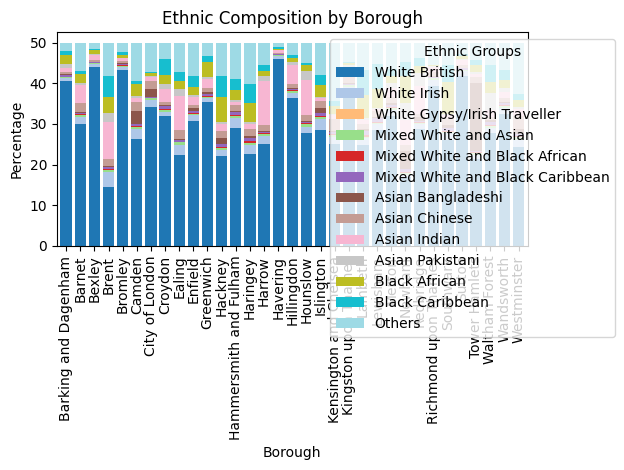

In [49]:
plt.figure(figsize=(14, 8))
data_percentage.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title("Ethnic Composition by Borough")
plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Ethnic Groups")
plt.tight_layout()
plt.show()

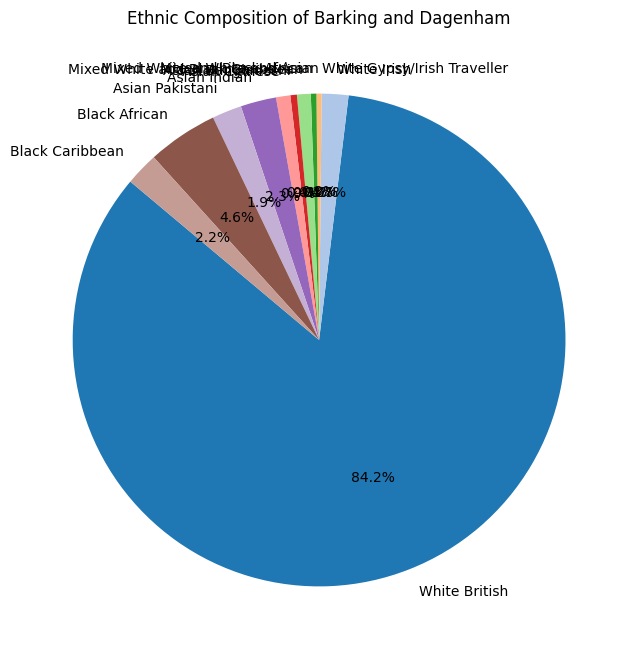

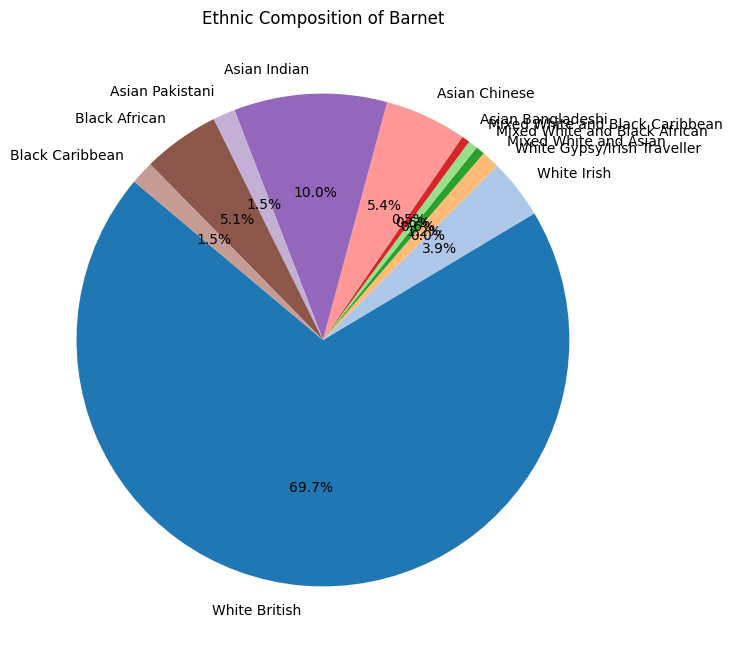

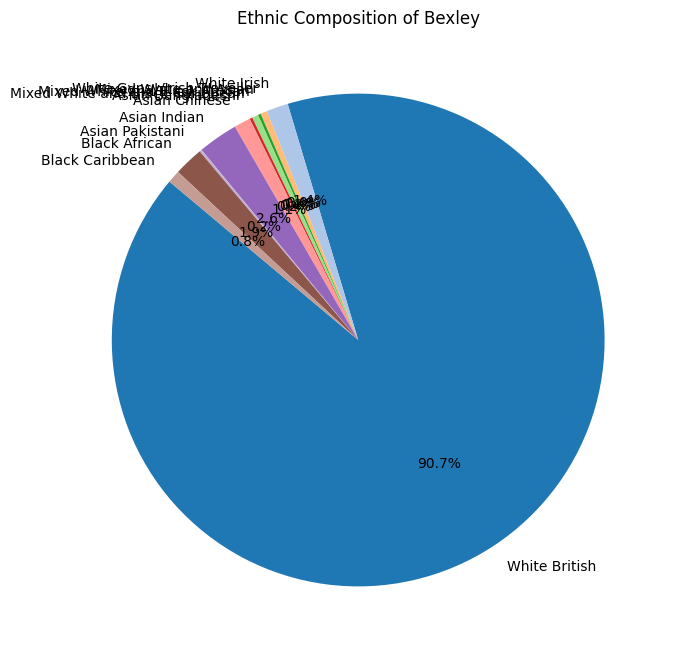

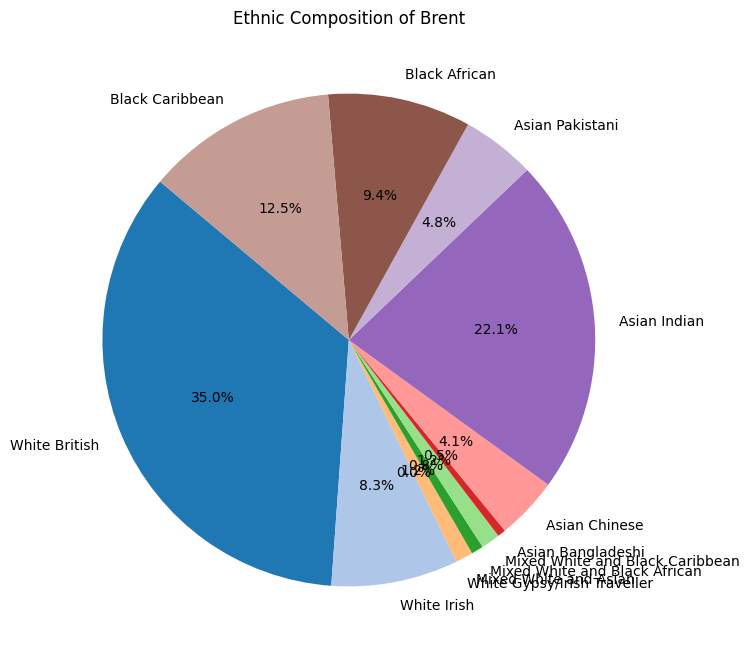

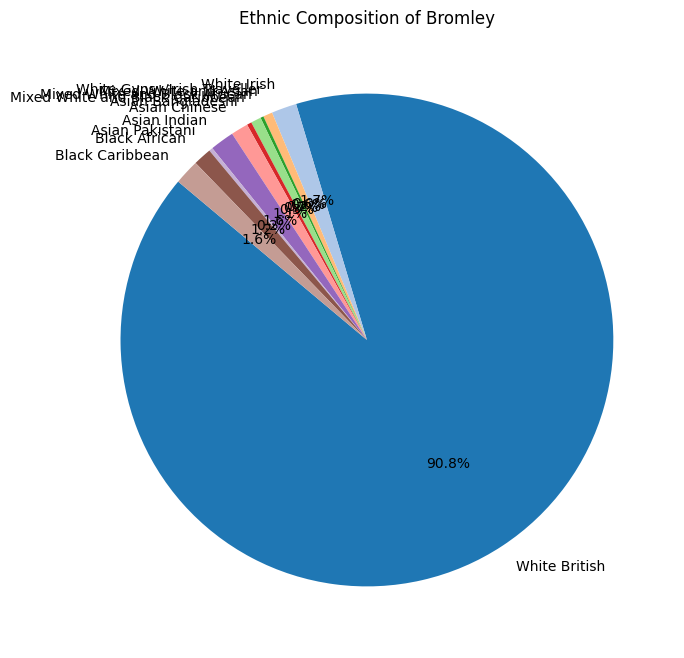

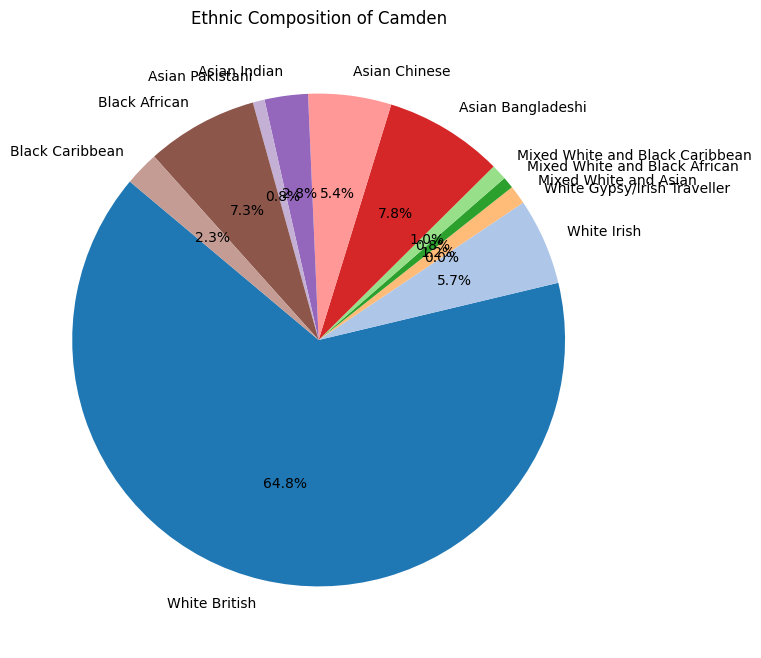

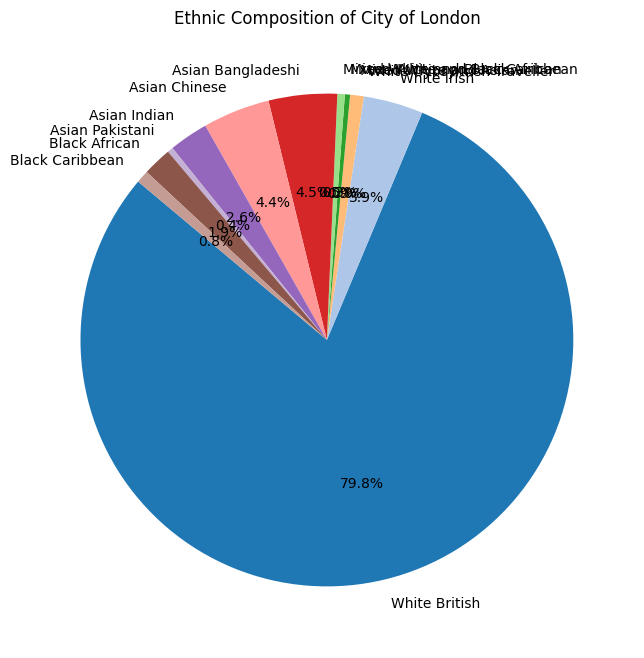

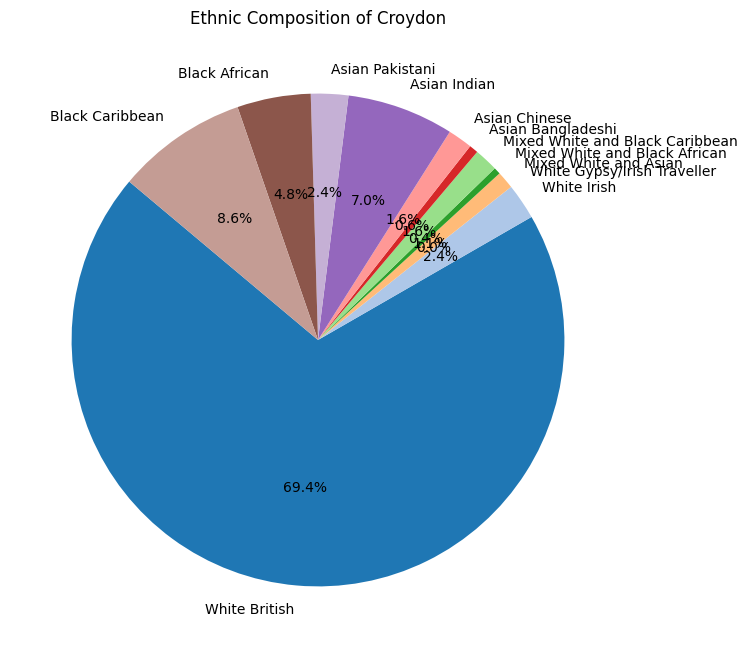

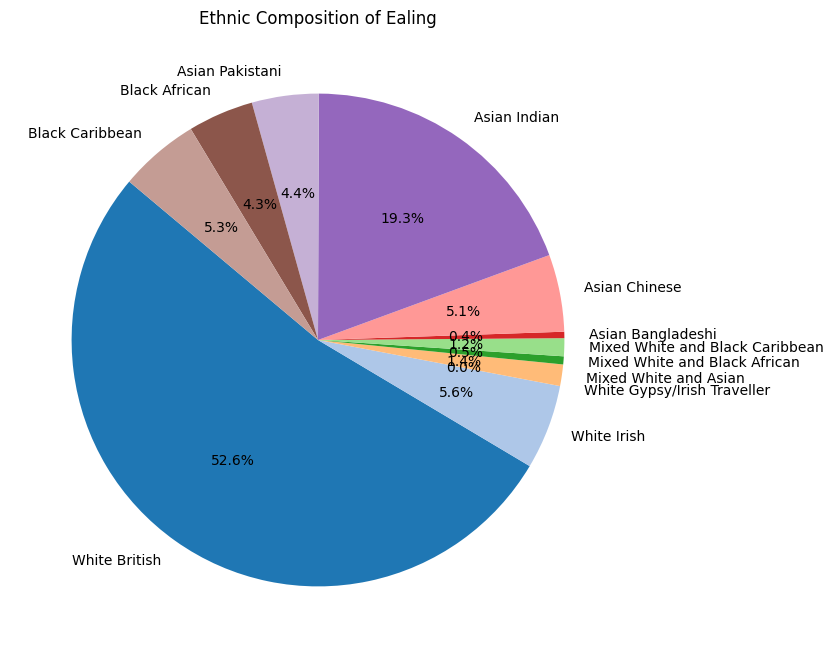

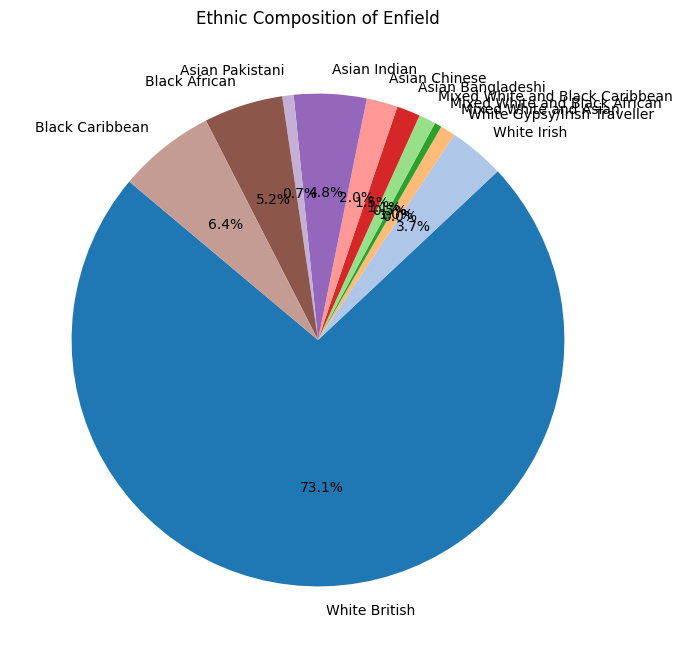

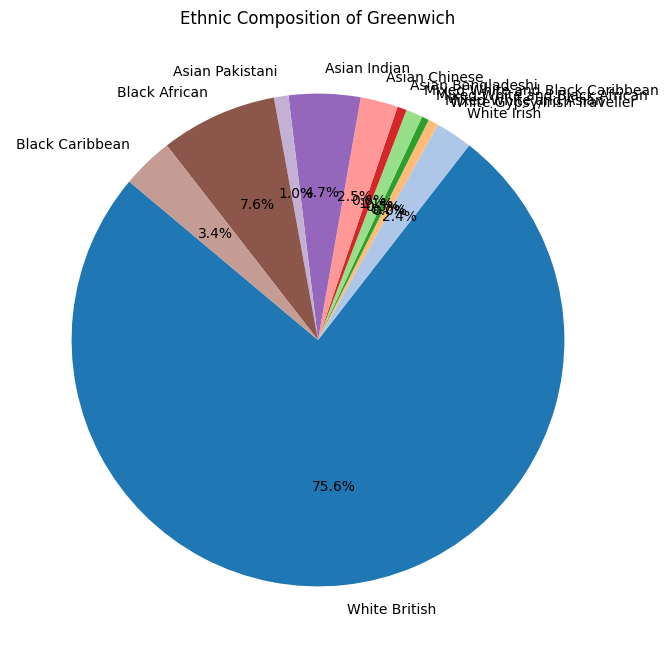

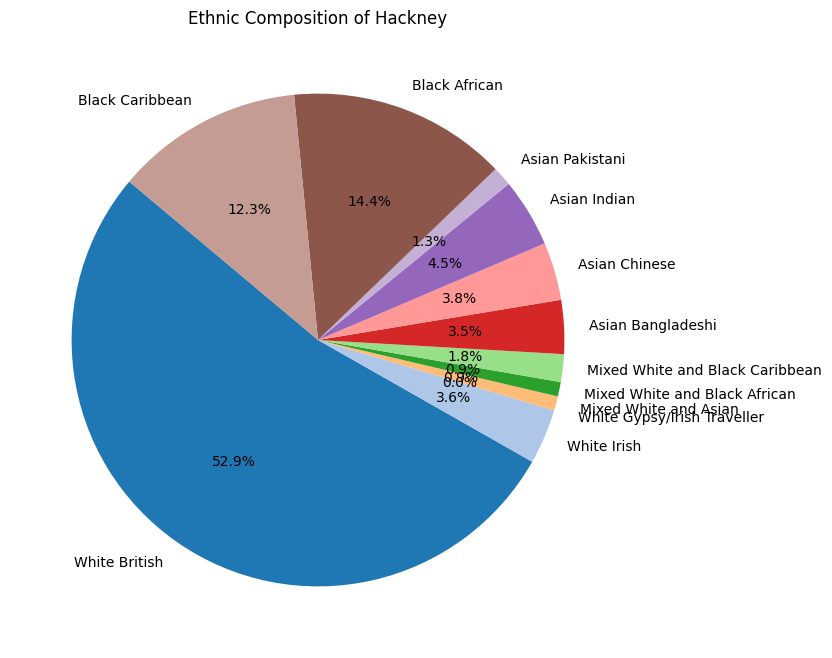

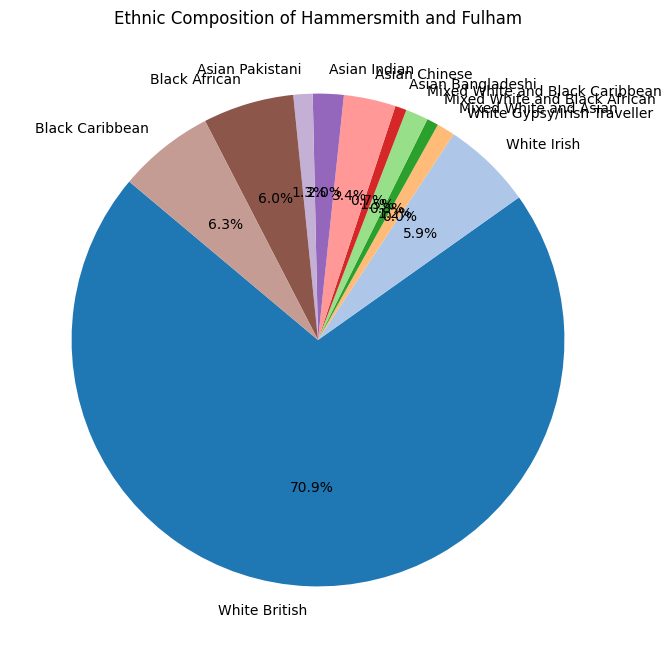

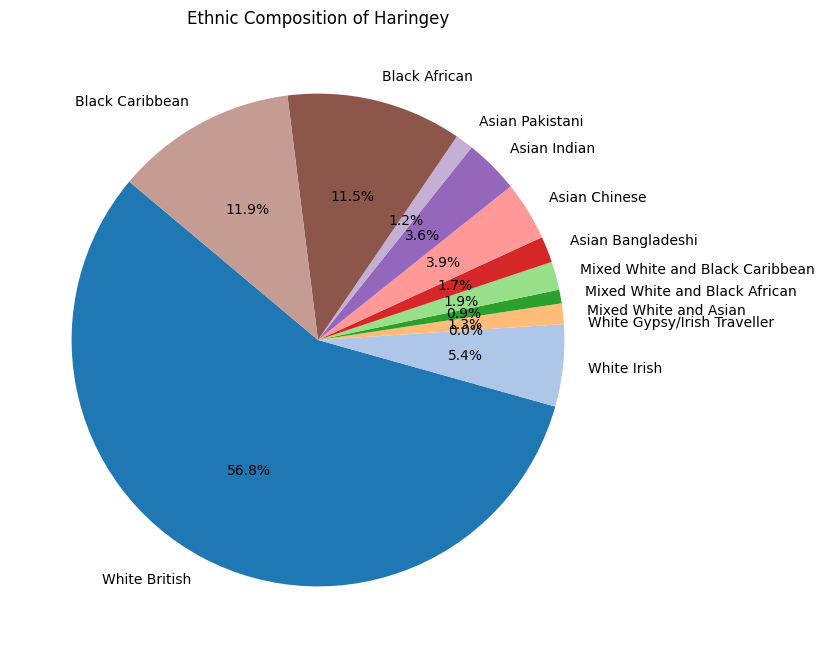

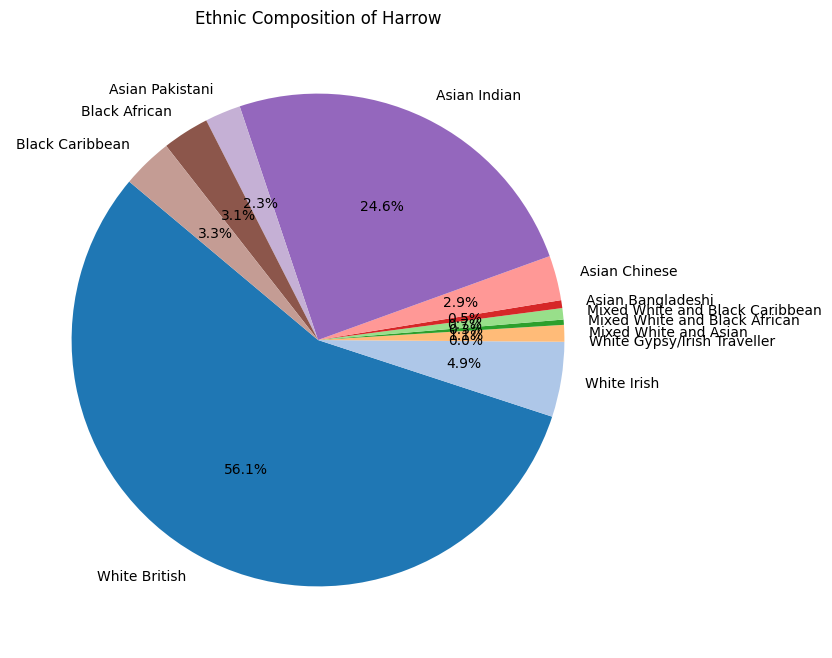

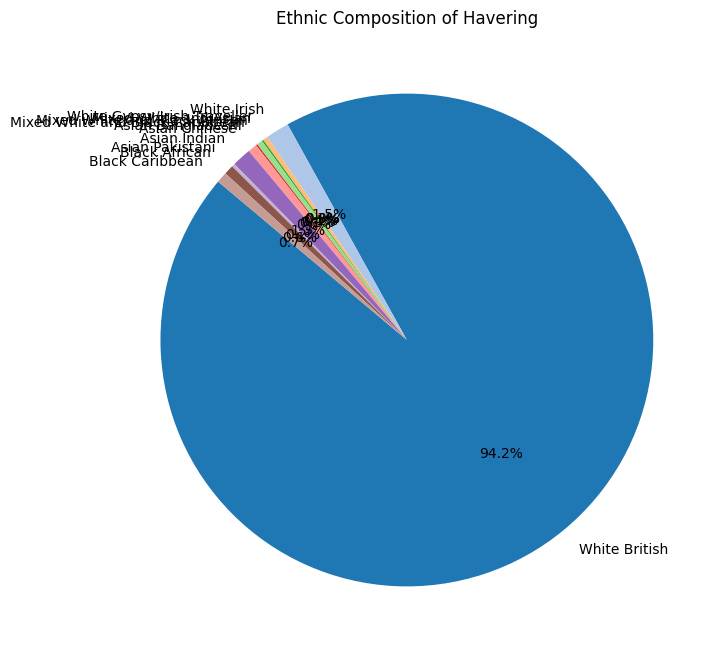

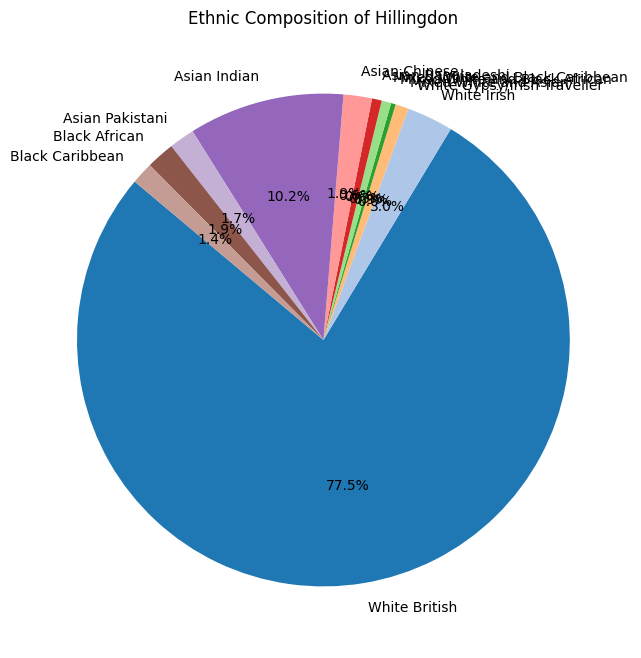

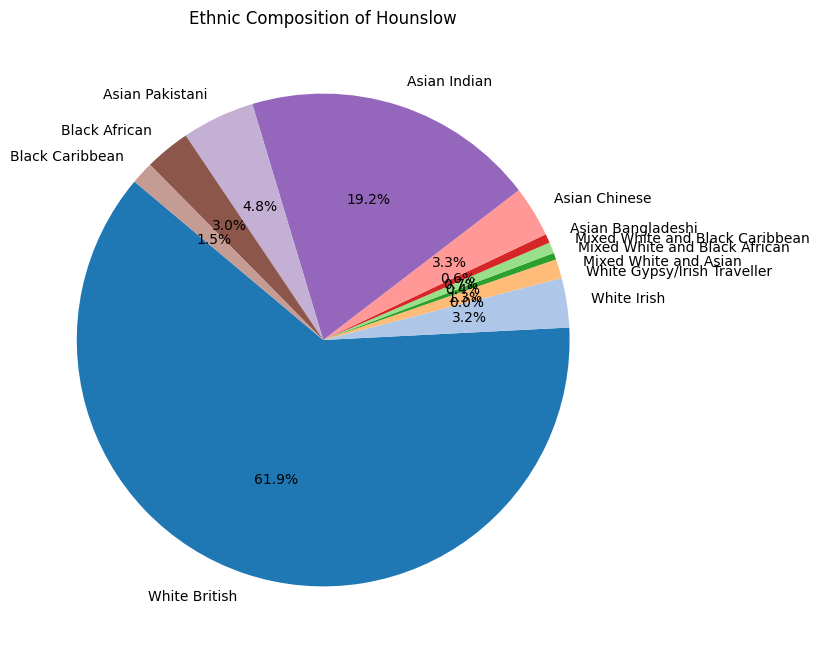

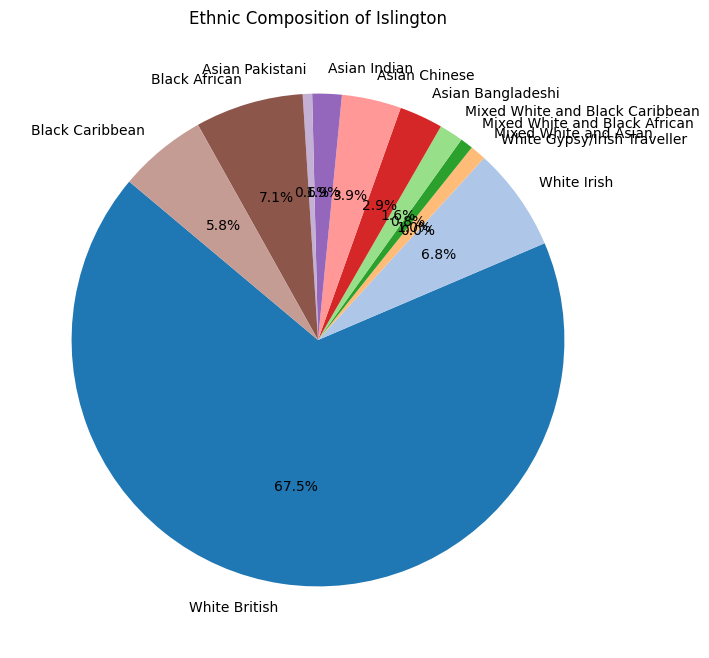

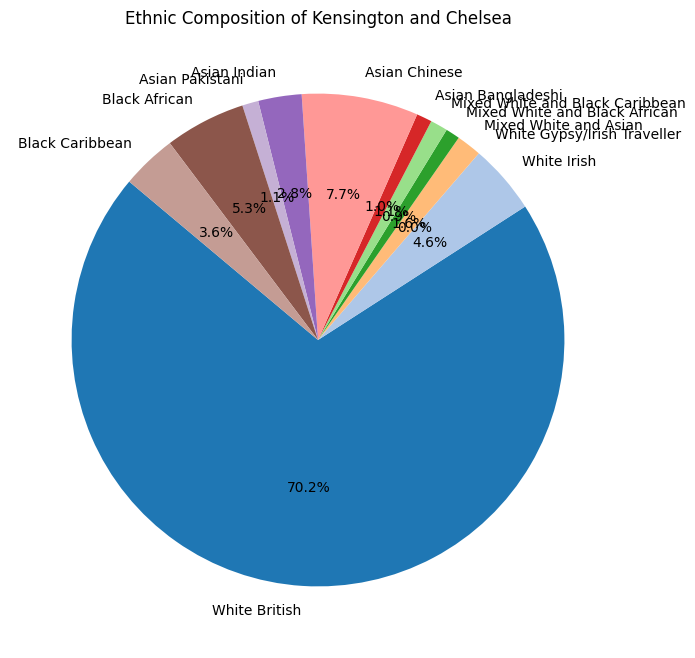

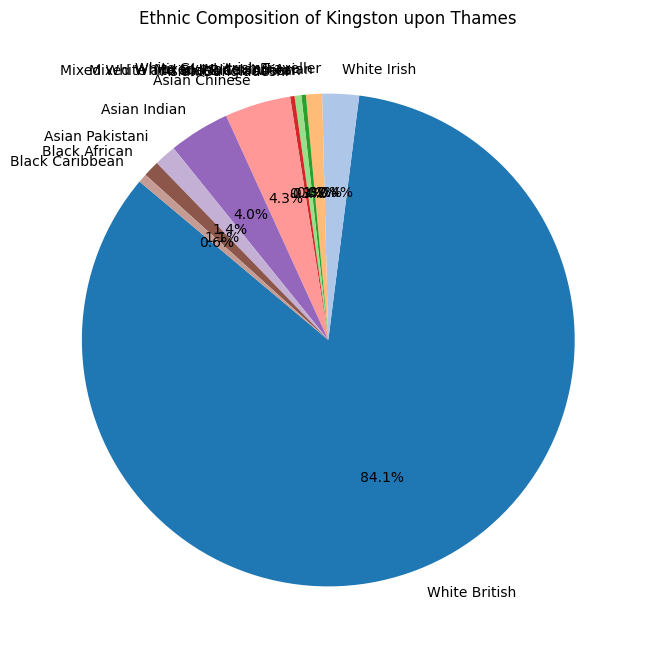

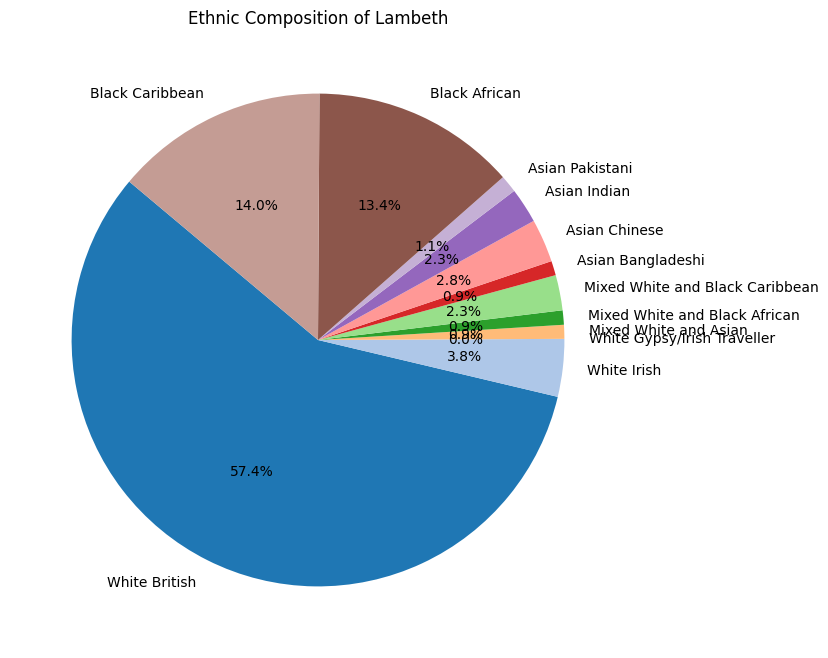

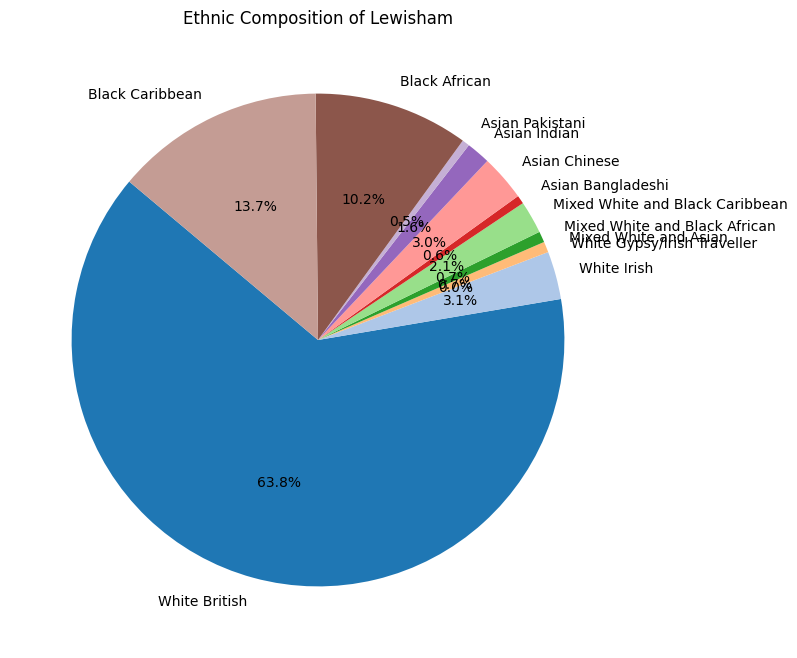

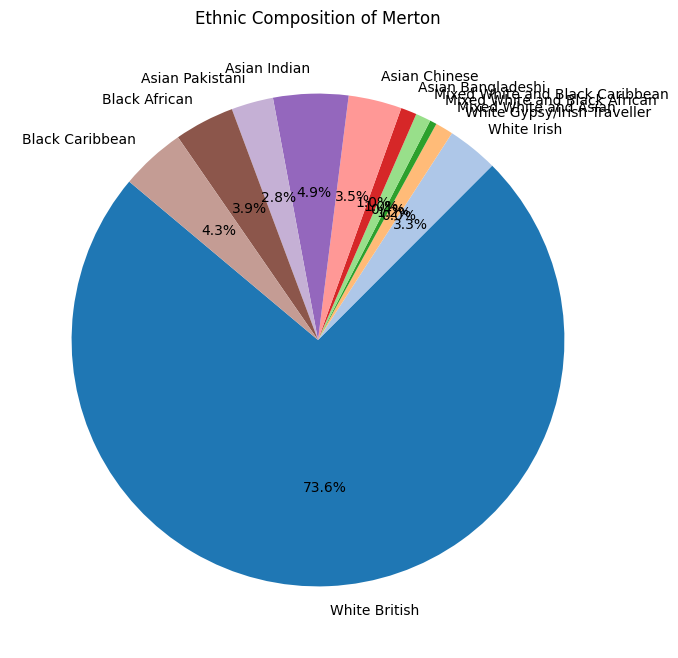

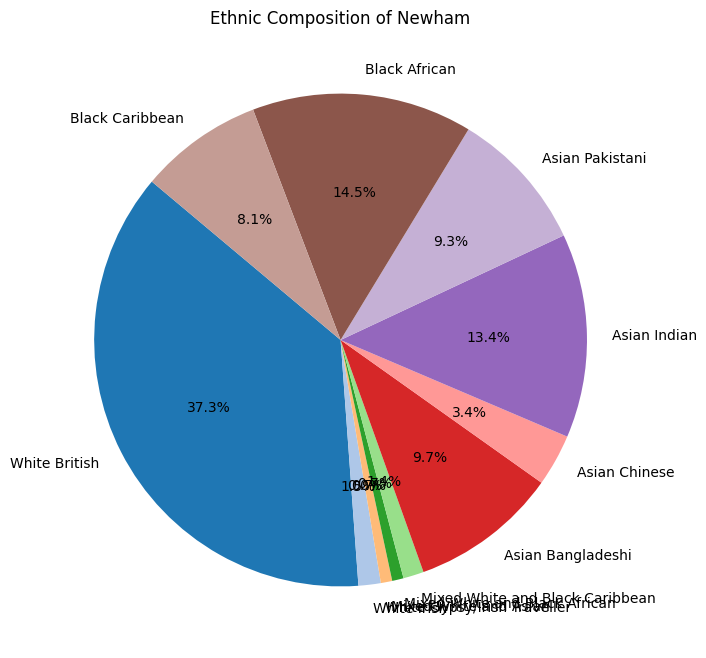

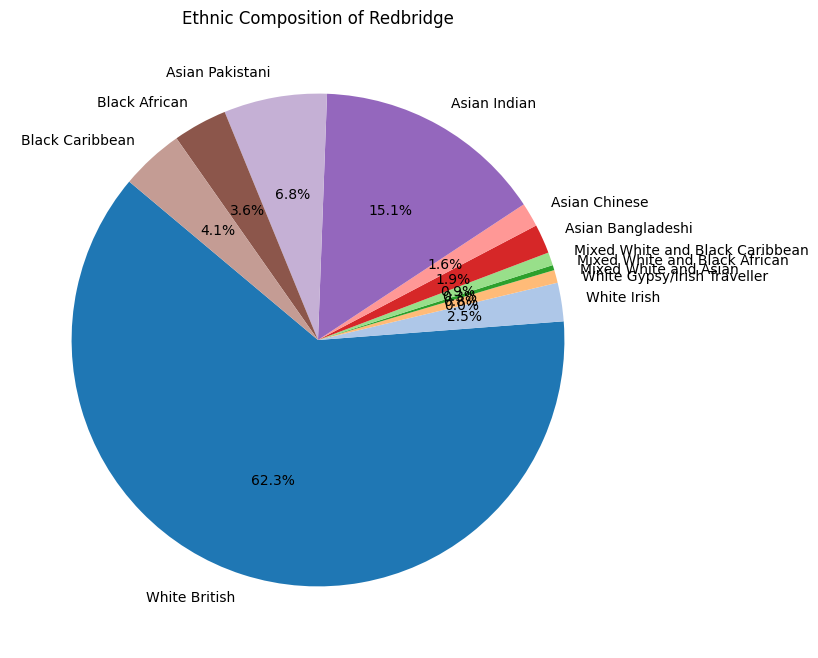

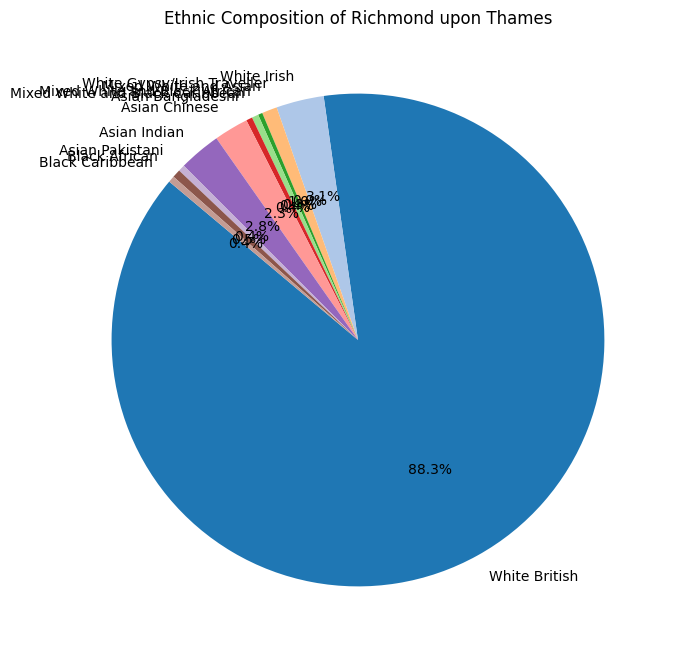

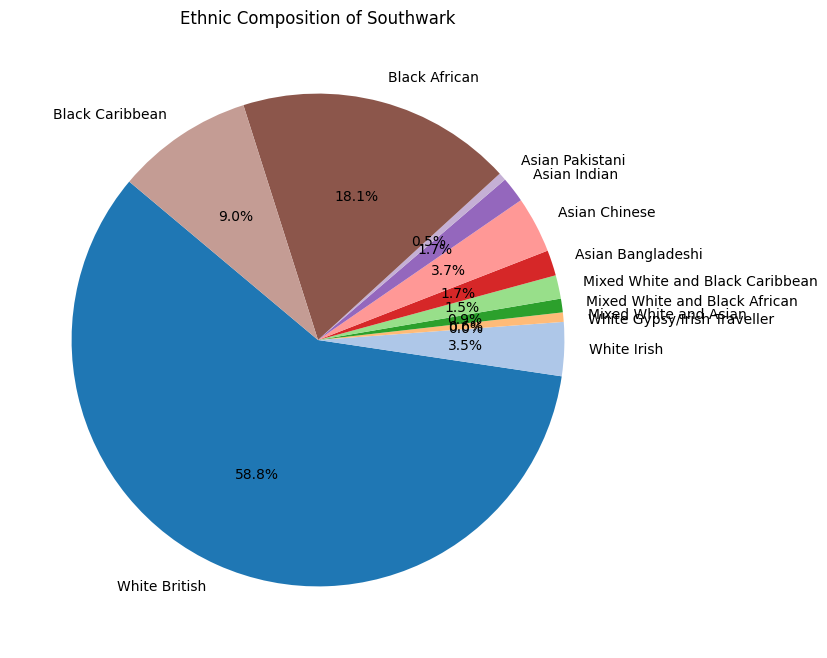

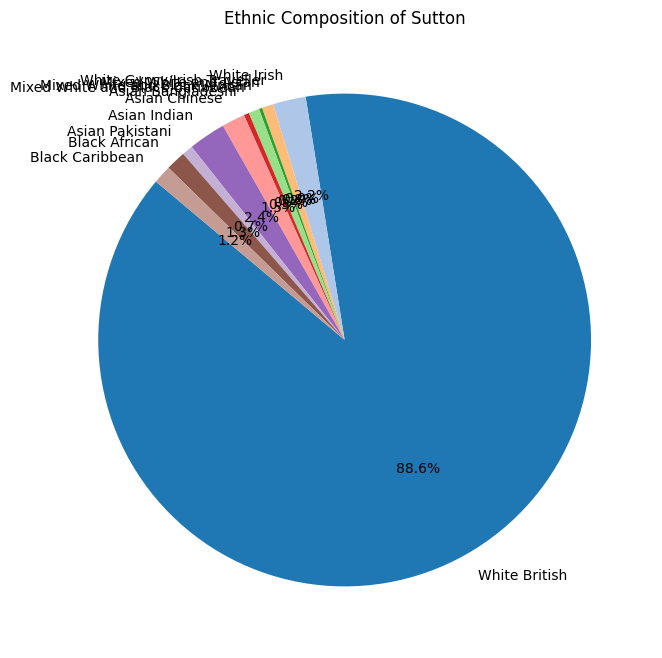

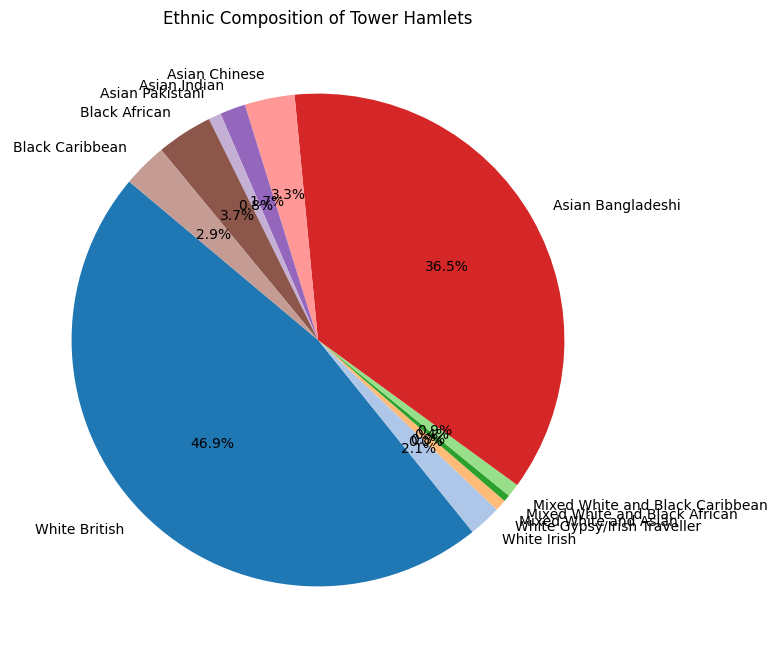

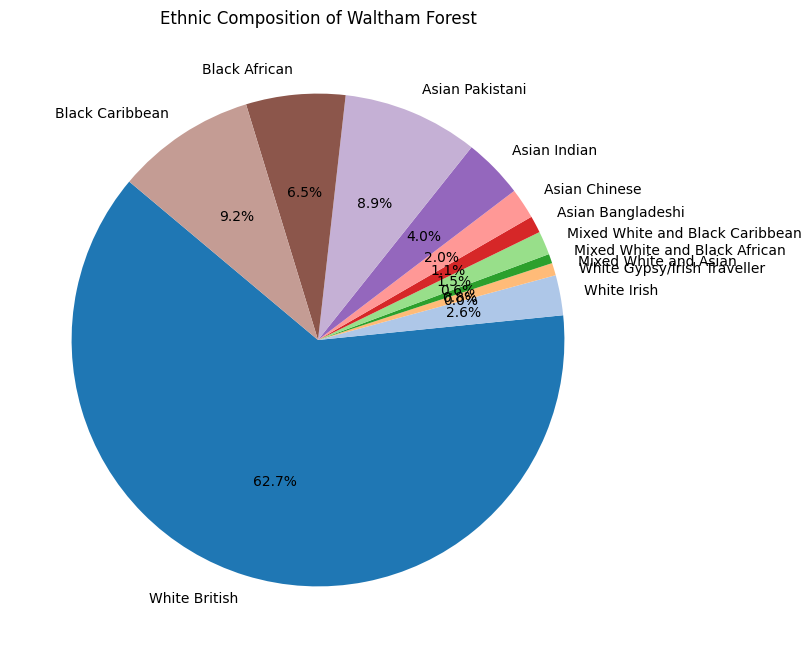

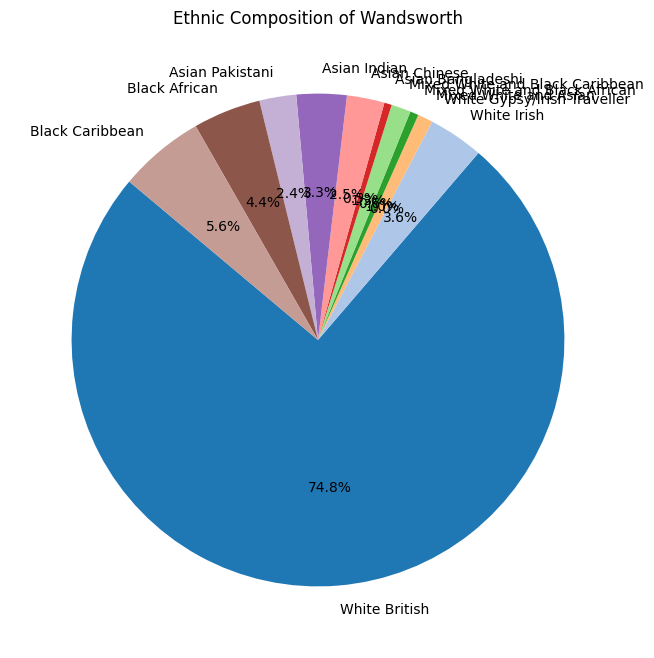

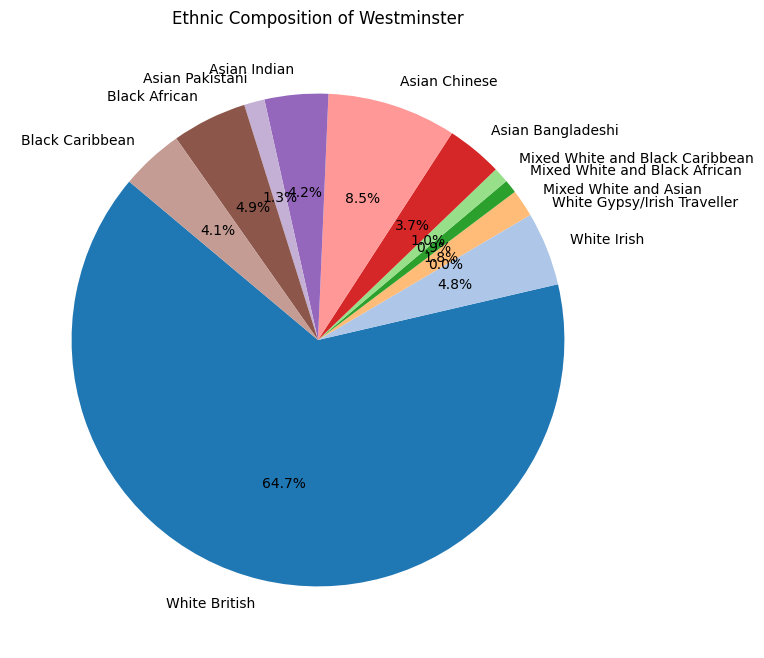

In [50]:

for borough in grouped_data.index.to_list() :

    borough_data = grouped_data.loc[borough, ethnic_columns]

    plt.figure(figsize=(8, 8))
    plt.pie(borough_data, labels=ethnic_columns, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", len(ethnic_columns)))
    plt.title(f"Ethnic Composition of {borough}")
    plt.show()

In [51]:
grouped_data

White British  White Irish  \
local authority name                                 
Barking and Dagenham           132566         2753   
Barnet                         188301        10545   
Bexley                         191947         3025   
Brent                           76893        18313   
Bromley                        255618         4652   
Camden                         104390         9149   
City of London                   4909          241   
Croydon                        210573         7130   
Ealing                         135139        14285   
Enfield                        167394         8398   
Greenwich                      151291         4862   
Hackney                         89490         6117   
Hammersmith and Fulham          95909         7983   
Haringey                        98028         9302   
Harrow                         103207         9057   
Havering                       206365         3390   
Hillingdon                     176244         6911   
Hounslow                       118421         6198   
Islington                       99784        10057   
Kensington and Chelsea          79594         5183   
Kingston upon Thames           111810         3201   
Lambeth                        131939         8689   
Lewisham                       141814         6990   
Merton                         120378         5464   
Newham                          82390         3231   
Redbridge                      137097         5559   
Richmond upon Thames           135655         4805   
Southwark                      127752         7674   
Sutton                         150515         3664   
Tower Hamlets                   84151         3823   
Waltham Forest                 121694         5112   
Wandsworth                     168665         8151   
Westminster                     87938         6574   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            0.0                    534   
Barnet                                          0.0                   3218   
Bexley                                          0.0                    915   
Brent                                           0.0                   2529   
Bromley                                         0.0                   1716   
Camden                                          0.0                   1983   
City of London                                  0.0                     55   
Croydon                                         0.0                   3480   
Ealing                                          0.0                   3629   
Enfield                                         0.0                   2278   
Greenwich                                       0.0                   1328   
Hackney                                         0.0                   1576   
Hammersmith and Fulham                          0.0                   1609   
Haringey                                        0.0                   2329   
Harrow                                          0.0                   2018   
Havering                                        0.0                    705   
Hillingdon                                      0.0                   1983   
Hounslow                                        0.0                   2407   
Islington                                       0.0                   1543   
Kensington and Chelsea                          0.0                   1863   
Kingston upon Thames                            0.0                   1398   
Lambeth                                         0.0                   2100   
Lewisham                                        0.0                   1565   
Merton                                          0.0                   1918   
Newham                                          0.0                   1652   
Redbridge                  

#### Ethnic Race wise distribution 

<Figure size 1000x1000 with 0 Axes>

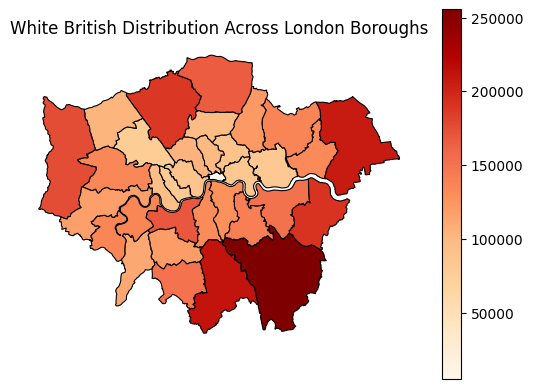

<Figure size 1000x1000 with 0 Axes>

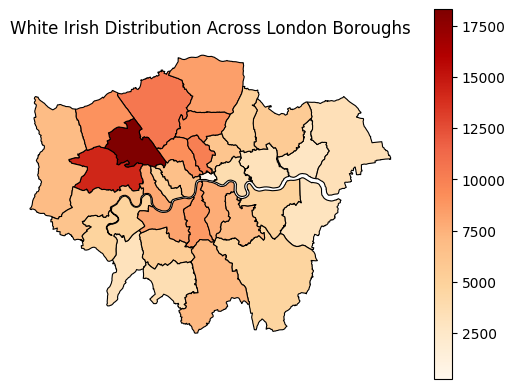

<Figure size 1000x1000 with 0 Axes>

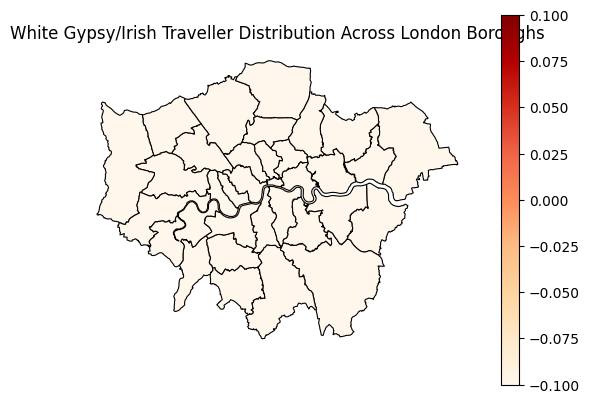

<Figure size 1000x1000 with 0 Axes>

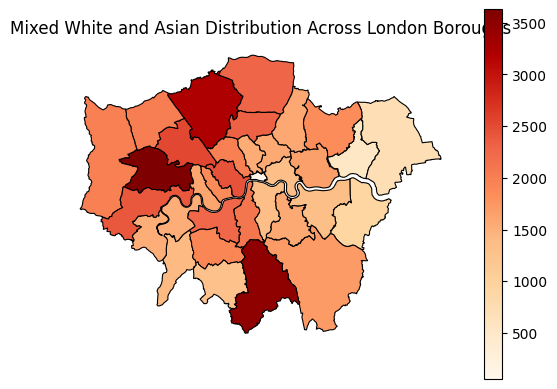

<Figure size 1000x1000 with 0 Axes>

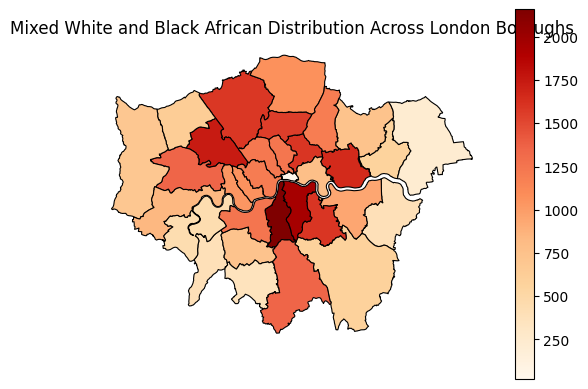

<Figure size 1000x1000 with 0 Axes>

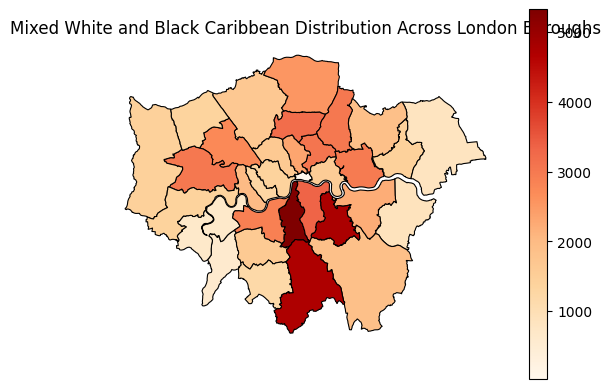

<Figure size 1000x1000 with 0 Axes>

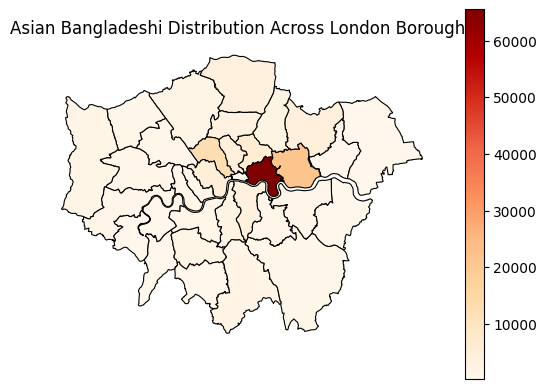

<Figure size 1000x1000 with 0 Axes>

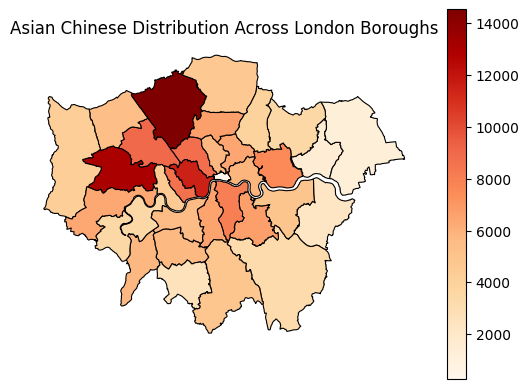

<Figure size 1000x1000 with 0 Axes>

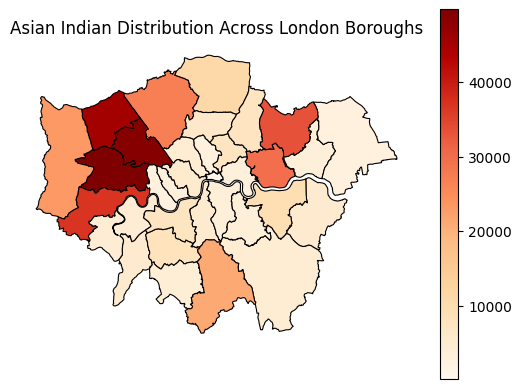

<Figure size 1000x1000 with 0 Axes>

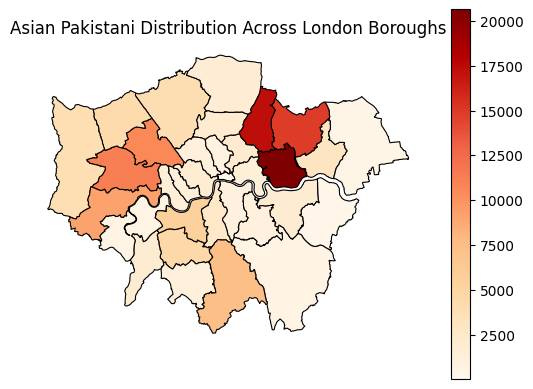

<Figure size 1000x1000 with 0 Axes>

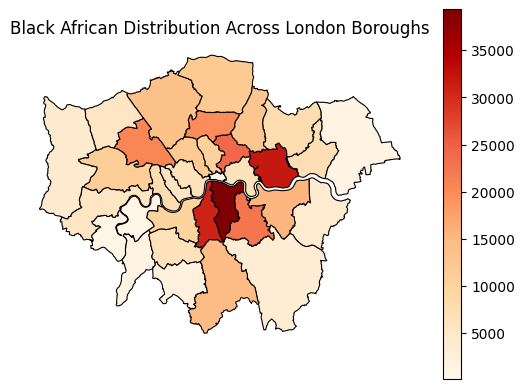

<Figure size 1000x1000 with 0 Axes>

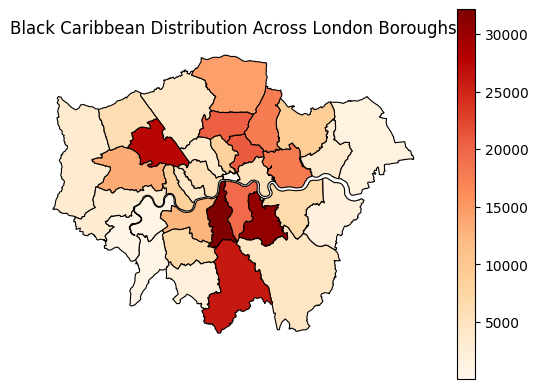

<Figure size 1000x1000 with 0 Axes>

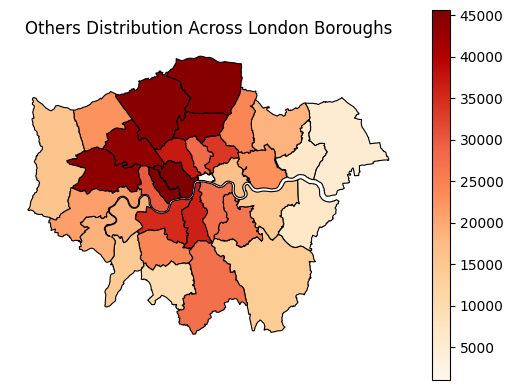

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame

# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')

# Ensure the 'local authority name' column in your data matches the borough names in the geo_df
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Update with actual column name
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')

# Plot the choropleth for each ethnic group
ethnic_columns = grouped_data.columns[:-1]  # All ethnic columns, excluding 'Total Population'

# 1. Plotting a map for each ethnic group distribution
for column in ethnic_columns:
    plt.figure(figsize=(10, 10))
    merged_data.plot(column=column, cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
    plt.title(f"{column} Distribution Across London Boroughs")
    plt.axis('off')
    plt.show()


In [53]:
grouped_data

White British  White Irish  \
local authority name                                 
Barking and Dagenham           132566         2753   
Barnet                         188301        10545   
Bexley                         191947         3025   
Brent                           76893        18313   
Bromley                        255618         4652   
Camden                         104390         9149   
City of London                   4909          241   
Croydon                        210573         7130   
Ealing                         135139        14285   
Enfield                        167394         8398   
Greenwich                      151291         4862   
Hackney                         89490         6117   
Hammersmith and Fulham          95909         7983   
Haringey                        98028         9302   
Harrow                         103207         9057   
Havering                       206365         3390   
Hillingdon                     176244         6911   
Hounslow                       118421         6198   
Islington                       99784        10057   
Kensington and Chelsea          79594         5183   
Kingston upon Thames           111810         3201   
Lambeth                        131939         8689   
Lewisham                       141814         6990   
Merton                         120378         5464   
Newham                          82390         3231   
Redbridge                      137097         5559   
Richmond upon Thames           135655         4805   
Southwark                      127752         7674   
Sutton                         150515         3664   
Tower Hamlets                   84151         3823   
Waltham Forest                 121694         5112   
Wandsworth                     168665         8151   
Westminster                     87938         6574   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            0.0                    534   
Barnet                                          0.0                   3218   
Bexley                                          0.0                    915   
Brent                                           0.0                   2529   
Bromley                                         0.0                   1716   
Camden                                          0.0                   1983   
City of London                                  0.0                     55   
Croydon                                         0.0                   3480   
Ealing                                          0.0                   3629   
Enfield                                         0.0                   2278   
Greenwich                                       0.0                   1328   
Hackney                                         0.0                   1576   
Hammersmith and Fulham                          0.0                   1609   
Haringey                                        0.0                   2329   
Harrow                                          0.0                   2018   
Havering                                        0.0                    705   
Hillingdon                                      0.0                   1983   
Hounslow                                        0.0                   2407   
Islington                                       0.0                   1543   
Kensington and Chelsea                          0.0                   1863   
Kingston upon Thames                            0.0                   1398   
Lambeth                                         0.0                   2100   
Lewisham                                        0.0                   1565   
Merton                                          0.0                   1918   
Newham                                          0.0                   1652   
Redbridge                  

In [54]:
merged_data

local authority name  cartodb_id                created_at  \
0     Barking and Dagenham           1 2013-09-16 02:14:14+02:00   
1                   Barnet           2 2013-09-16 02:14:14+02:00   
2                   Bexley           3 2013-09-16 02:14:14+02:00   
3                    Brent           4 2013-09-16 02:14:14+02:00   
4                  Bromley           5 2013-09-16 02:14:14+02:00   
5                   Camden           6 2013-09-16 02:14:14+02:00   
6           City of London           7 2013-09-16 02:14:14+02:00   
7                   Ealing           8 2013-09-16 02:14:14+02:00   
8                  Enfield           9 2013-09-16 02:14:14+02:00   
9                Greenwich          10 2013-09-16 02:14:14+02:00   
10                 Hackney          11 2013-09-16 02:14:14+02:00   
11  Hammersmith and Fulham          12 2013-09-16 02:14:14+02:00   
12                Haringey          13 2013-09-16 02:14:14+02:00   
13                  Harrow          14 2013-09-16 02:14:14+02:00   
14                Havering          15 2013-09-16 02:14:14+02:00   
15              Hillingdon          16 2013-09-16 02:14:14+02:00   
16                Hounslow          17 2013-09-16 02:14:14+02:00   
17               Islington          18 2013-09-16 02:14:14+02:00   
18  Kensington and Chelsea          19 2013-09-16 02:14:14+02:00   
19    Kingston upon Thames          20 2013-09-16 02:14:14+02:00   
20                 Lambeth          21 2013-09-16 02:14:14+02:00   
21                Lewisham          22 2013-09-16 02:14:14+02:00   
22                  Merton          23 2013-09-16 02:14:14+02:00   
23                  Newham          24 2013-09-16 02:14:14+02:00   
24               Redbridge          25 2013-09-16 02:14:14+02:00   
25    Richmond upon Thames          26 2013-09-16 02:14:14+02:00   
26               Southwark          27 2013-09-16 02:14:14+02:00   
27                  Sutton          28 2013-09-16 02:14:14+02:00   
28           Tower Hamlets          29 2013-09-16 02:14:14+02:00   
29          Waltham Forest          30 2013-09-16 02:14:14+02:00   
30              Wandsworth          31 2013-09-16 02:14:14+02:00   
31             Westminster          32 2013-09-16 02:14:14+02:00   
32                 Croydon          33 2013-09-16 02:14:14+02:00   

                  updated_at  \
0  2013-09-16 02:14:14+02:00   
1  2013-09-16 02:14:14+02:00   
2  2013-09-16 02:14:14+02:00   
3  2013-09-16 02:14:14+02:00   
4  2013-09-16 02:14:14+02:00   
5  2013-09-16 02:14:14+02:00   
6  2013-09-16 02:14:14+02:00   
7  2013-09-16 02:14:14+02:00   
8  2013-09-16 02:14:14+02:00   
9  2013-09-16 02:14:14+02:00   
10 2013-09-16 02:14:14+02:00   
11 2013-09-16 02:14:14+02:00   
12 2013-09-16 02:14:14+02:00   
13 2013-09-16 02:14:14+02:00   
14 2013-09-16 02:14:14+02:00   
15 2013-09-16 02:14:14+02:00   
16 2013-09-16 02:14:14+02:00   
17 2013-09-16 02:14:14+02:00   
18 2013-09-16 02:14:14+02:00   
19 2013-09-16 02:14:14+02:00   
20 2013-09-16 02:14:14+02:00   
21 2013-09-16 02:14:14+02:00   
22 2013-09-16 02:14:14+02:00   
23 2013-09-16 02:14:14+02:00   
24 2013-09-16 02:14:14+02:00   
25 2013-09-16 02:14:14+02:00   
26 2013-09-16 02:14:14+02:00   
27 2013-09-16 02:14:14+02:00   
28 2013-09-16 02:14:14+02:00   
29 2013-09-16 02:14:14+02:00   
30 2013-09-16 02:14:14+02:00   
31 2013-09-16 02:14:14+02:00   
32 2013-09-16 02:14:14+02:00   

                                             geometry  White British  \
0   MULTIPOLYGON (((0.06833 51.54441, 0.06705 51.5...         132566   
1   POLYGON ((-0.26716 51.60037, -0.26573 51.59901...         188301   
2   POLYGON ((0.07532 51.43203, 0.08068 51.43082, ...         191947   
3   POLYGON ((-0.33558 51.55658, -0.33224 51.55589...          76893   
4   POLYGON ((0.00227 51.32914, 0.00316 51.32699, ...         255618   
5   POLYGON ((-0.14844 51.52785, -0.1472 51.52504,...         104390   
6   POLYGON ((-0.07582 51.51583, -0.07692 51.51671...           4909   
7   POLYGON ((-0.25308 51.50

#### Dot plot for London 

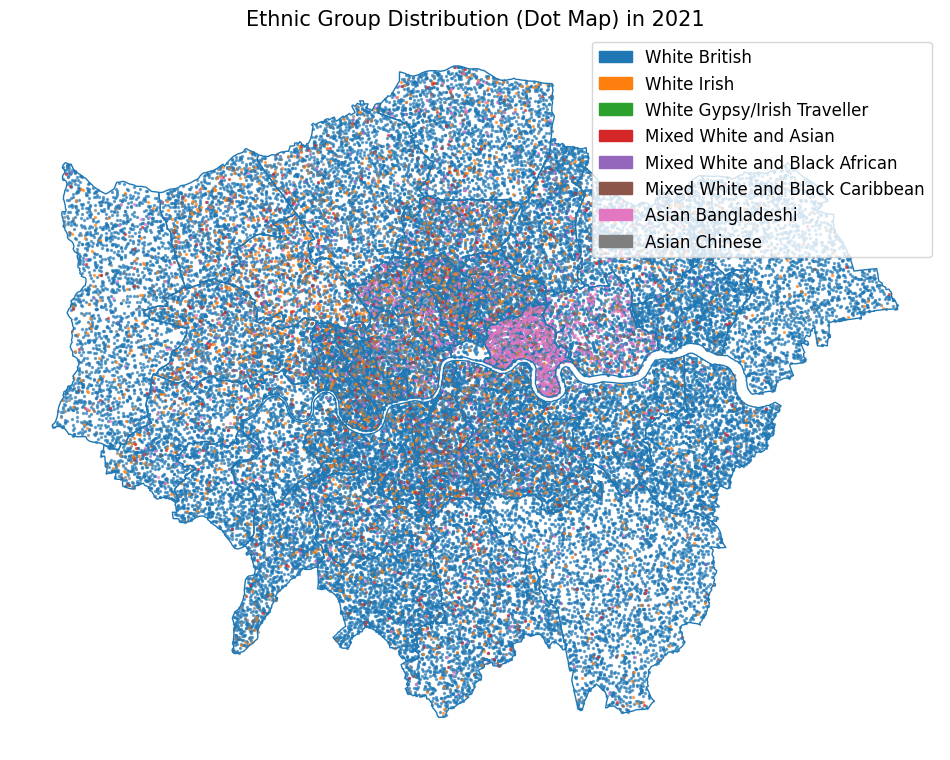

In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point
import matplotlib.patches as mpatches  # For custom legend

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame
def random_point_in_polygon(polygon):
    """Generate a random point within a polygon"""
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            return x, y


# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Adjust if necessary
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')


# Define ethnic groups and their colors
ethnic_columns = grouped_data.columns[:-1]  # Excluding 'Total Population'
ethnic_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Sampling factor - Adjust this to control the density of dots
sampling_factor = 0.01  # For example, only plot 1% of the population

# Loop through each borough and generate points for each ethnic group
for borough, row in merged_data.iterrows():
    for ethnic_group, color in zip(ethnic_columns, ethnic_colors):
        population = row[ethnic_group]
        
        # Generate random points within the geometry of the borough, scaling population
        if population > 0:
            # Get the borough's polygon shape
            borough_geom = row['geometry']
            
            # Calculate the number of points to plot based on the population and sampling factor
            num_points = int(population * sampling_factor)  # Reduce number of points by sampling factor
            
            # Generate random points within the borough's boundary
            points = []
            for _ in range(num_points):
                x, y = random_point_in_polygon(borough_geom)
                points.append((x, y))
            
            # Convert points to a 2D numpy array (for scatter plotting)
            points = np.array(points)
            
            # Plot points only if there are any generated points
            if points.size > 0:
                ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.6, s=2)

# Plot the map
geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title('Ethnic Group Distribution (Dot Map) in 2021', fontsize=15)
plt.axis('off')

# Create a custom legend
legend_labels = ethnic_columns  # Ethnic group names
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(ethnic_colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()

# Function to generate a random point within a polygon


#### Metrices

In [56]:
import numpy as np
import pandas as pd

# Assuming 'grouped_data' is your DataFrame with ethnic population data

# Step 1: Calculate the proportions of each ethnic group in each borough
ethnic_columns = grouped_data.columns[:-1]  # Exclude 'Total Population'
grouped_data_proportions = grouped_data[ethnic_columns].div(grouped_data['Total_Population'], axis=0)

# Initialize an empty dictionary to store the metrics
metrics = {}

# Step 2: Calculate Shannon Diversity Index (SDI)
def shannon_diversity(proportions):
    return -np.sum(proportions * np.log(proportions + 1e-9))  # Adding a small value to avoid log(0)

# Calculate SDI for each borough
metrics['Shannon Diversity Index'] = grouped_data_proportions.apply(shannon_diversity, axis=1)

# Step 3: Calculate Simpson's Diversity Index
def simpsons_diversity(proportions):
    return 1 - np.sum(proportions ** 2)

# Calculate Simpson's Diversity Index for each borough
metrics['Simpson Diversity Index'] = grouped_data_proportions.apply(simpsons_diversity, axis=1)

# Step 4: Calculate the Ethnic Fractionalization Index (EFI)
def ethnic_fractionalization(proportions):
    return 1 - np.sum(proportions ** 2)

# Calculate EFI for each borough
metrics['Ethnic Fractionalization Index'] = grouped_data_proportions.apply(ethnic_fractionalization, axis=1)

# Step 5: Calculate Evenness Index (H' / ln(S), where S is the number of ethnic groups)
def evenness_index(row):
    shannon = shannon_diversity(row)
    num_groups = len(row)
    return shannon / np.log(num_groups)

# Calculate Evenness Index for each borough
metrics['Evenness Index'] = grouped_data_proportions.apply(evenness_index, axis=1)

# Step 6: Calculate Population Proportions for each ethnic group in each borough
ethnic_proportions = grouped_data_proportions * 100  # Convert to percentage
metrics['Ethnic Proportions'] = ethnic_proportions

# Step 7: (Optional) Calculate Dissimilarity Index between two boroughs (e.g., between Borough 1 and Borough 2)
def dissimilarity_index(group1_proportions, group2_proportions, total_population_proportions):
    return 0.5 * np.sum(np.abs(group1_proportions - group2_proportions) / total_population_proportions)

# Example: Calculate dissimilarity index between first two boroughs
borough1 = grouped_data_proportions.iloc[0]
borough2 = grouped_data_proportions.iloc[1]
total_population_proportions = grouped_data_proportions.sum(axis=0)
metrics['Dissimilarity Index'] = dissimilarity_index(borough1, borough2, total_population_proportions)

                                                     
                                        

In [57]:
metrics

{'Shannon Diversity Index': local authority name
 Barking and Dagenham      0.792368
 Barnet                    1.059045
 Bexley                    0.652523
 Brent                     1.338718
 Bromley                   0.680794
 Camden                    1.138607
 City of London            0.937918
 Croydon                   1.045243
 Ealing                    1.219544
 Enfield                   1.039877
 Greenwich                 0.950120
 Hackney                   1.235129
 Hammersmith and Fulham    1.071161
 Haringey                  1.205600
 Harrow                    1.126070
 Havering                  0.566728
 Hillingdon                0.904295
 Hounslow                  1.091984
 Islington                 1.108023
 Kensington and Chelsea    1.081248
 Kingston upon Thames      0.842450
 Lambeth                   1.169545
 Lewisham                  1.087535
 Merton                    1.033554
 Newham                    1.352523
 Redbridge                 1.105082
 Richmond upon 

    Proportions: We calculate the proportions of each ethnic group relative to the total population in each borough.
    Shannon Diversity Index (SDI): We calculate the SDI by applying the formula across all boroughs.
    Simpson’s Diversity Index: Calculated using the formula, representing the probability that two individuals belong to the same ethnic group.
    Ethnic Fractionalization Index (EFI): Indicates how likely it is that two randomly chosen individuals belong to different ethnic groups.
    Evenness Index: Measures how evenly the ethnic groups are distributed across each borough.
    Ethnic Proportions: Simply represents the percentage of each ethnic group in each borough.
    Dissimilarity Index: Optional, compares the distribution of ethnic groups between two boroughs.

Additional Metrics for Spatial Analysis:

    Segregation Index: Measures how different groups are spatially segregated within London.
    Cluster Analysis (e.g., K-Means): To identify areas with high concentrations of particular ethnic groups.